In [7]:
%matplotlib inline

import numpy
import matplotlib.pyplot as plt
import daft

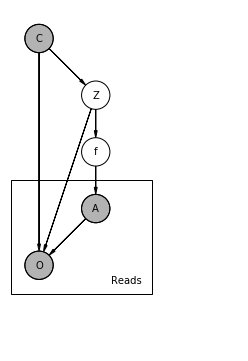

In [65]:
pgm = daft.PGM((4,6), origin = (0.5, 0.5))
pgm.add_node(daft.Node('context', 'C', 1, 6, observed=True))
pgm.add_node(daft.Node('z', 'Z', 2, 5))
pgm.add_node(daft.Node('fraction', 'f', 2, 4))
pgm.add_node(daft.Node('allele', 'A', 2, 3, observed=True))
pgm.add_node(daft.Node('orientation', 'O', 1, 2, observed=True))

pgm.add_edge('context','z')
pgm.add_edge('z','fraction')
pgm.add_edge('fraction','allele')
pgm.add_edge('allele','orientation')

pgm.add_edge('context','orientation')
pgm.add_edge('z','orientation')

tweak=0.2
pgm.add_plate(daft.Plate((0.5, 1.5, 2.5, 2), label='Reads', label_offset=(100,10)))

pgm.render()
pgm.figure.savefig("pgm.png")